In [1]:
import numpy as np
import matplotlib.pyplot as plt

Given a transfer function

\begin{equation*}
G(s) = \frac{K}{1+sT}
\end{equation*}

calculate the frequency response and draw a bode plot.

We derive the frequency response function from the transfer function by replacing $s$ with $j\omega$:

\begin{equation*}
G(j\omega) = \frac{K}{1+j\omega T}
\end{equation*}

In [2]:
def G(omega):
    K = 10; T = 0.1
    j_omega = np.zeros_like(omega, dtype="complex64")
    j_omega.imag = omega
    return K/(1+j_omega*T)

In [3]:
# quick test
G([50, 100])

array([0.3846154 -1.923077j  , 0.09900989-0.99009895j], dtype=complex64)

Create an array of frequencies to plot

In [4]:
# 10^0 Hz to 10^9 Hz
omega_array = np.logspace(-1, 9, 10000)

Calculate the frequency response

In [5]:
freq_response_array = G(omega_array)

# Locus

In [6]:
freq_response_real = np.real(freq_response_array)
freq_response_imag = np.imag(freq_response_array)

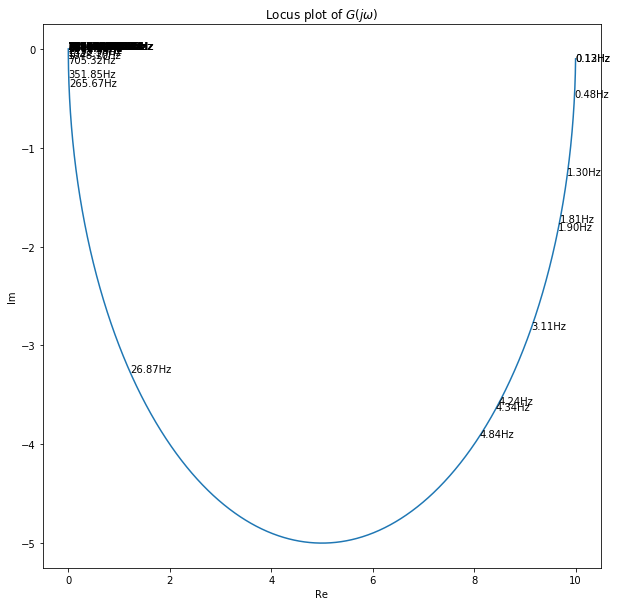

In [7]:
plt.figure(figsize=(10,10))
plt.plot(freq_response_real, freq_response_imag)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Locus plot of $G(j\omega)$")

idx = np.random.randint(0, freq_response_real.size, 50)

for i in idx:
    plt.text(freq_response_real[i], freq_response_imag[i], "%.2fHz"%omega_array[i])

Calculate the absolute value of the frequency response

In [8]:
freq_response_abs_array = np.abs(freq_response_array)

In [9]:
freq_response_phase_phi = np.arctan(freq_response_imag/freq_response_real)

Plot the frequency response

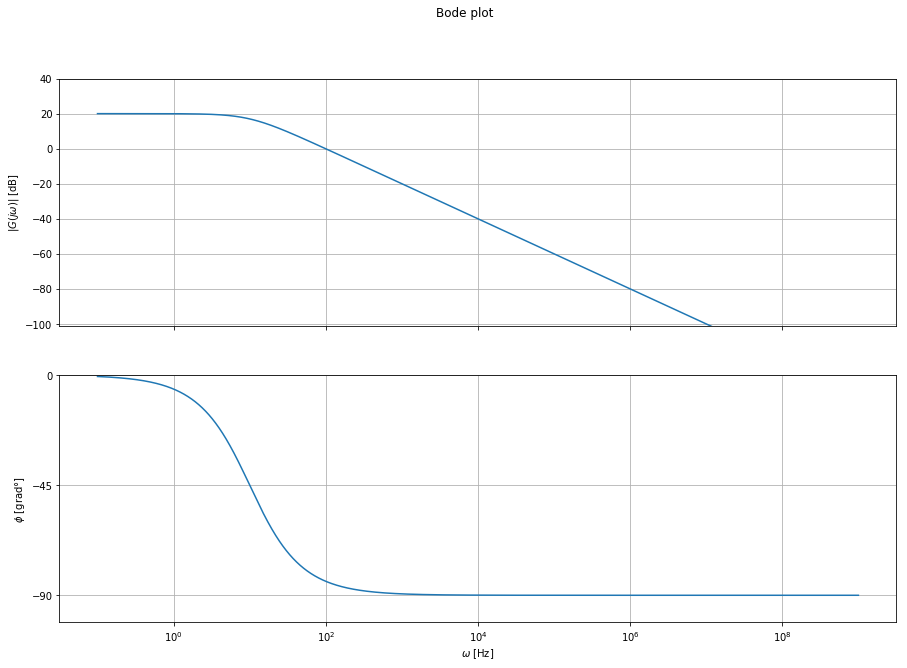

In [10]:
f, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)
# amplitude (abs)
ax[0].plot(omega_array, 20*np.log10(freq_response_abs_array))
ax[0].set_xscale("log")
ax[0].set_ylim([-101, 40])
ax[0].set_ylabel("$|G(j\omega)|$ [dB]")
ax[0].grid()

ax[1].plot(omega_array, freq_response_phase_phi*360/(2*np.pi))
ax[1].set_xscale("log")
ax[1].set_ylim([-101, 0])
ax[1].set_yticks([-90, -45, 0])
ax[1].set_ylabel("$\phi$ [grad°]")
ax[1].grid()


ax[1].set_xlabel("$\omega$ [Hz]");
f.suptitle("Bode plot");